In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Importing of dataset

In [60]:
salary_dataset = pd.read_csv('Partially Cleaned Salary Dataset.csv')
salary_dataset

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [61]:
salary_dataset.drop(columns=['Unnamed: 0'], inplace=True)
salary_dataset

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,IBM,Data Scientist,95,Bangalore,1191950.0
2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...
4334,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [62]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4339 non-null   object 
 1   Job Title          4339 non-null   object 
 2   Salaries Reported  4339 non-null   int64  
 3   Location           4339 non-null   object 
 4   Salary             4339 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 169.6+ KB


# Salary distribution

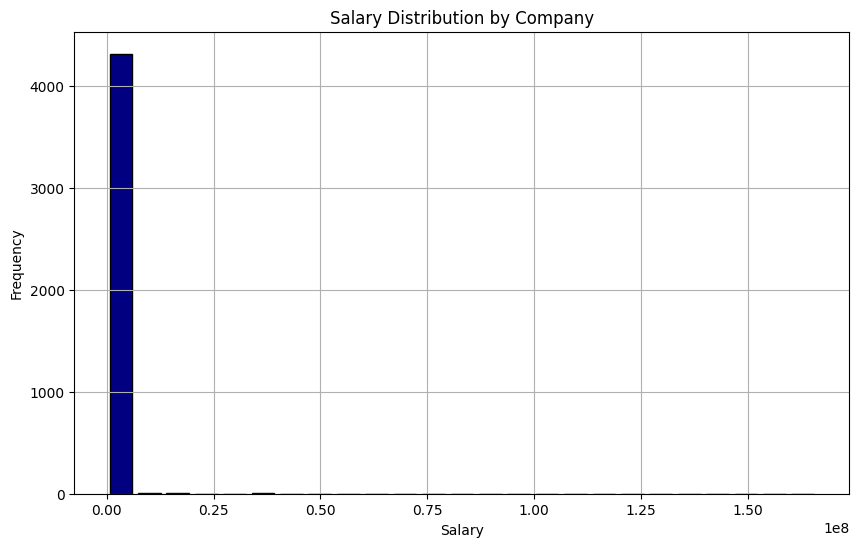

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(salary_dataset['Salary'], rwidth = 0.8, edgecolor = 'black', color='navy', bins=25)
plt.title('Salary Distribution by Company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid()

Text(0, 0.5, 'Salary')

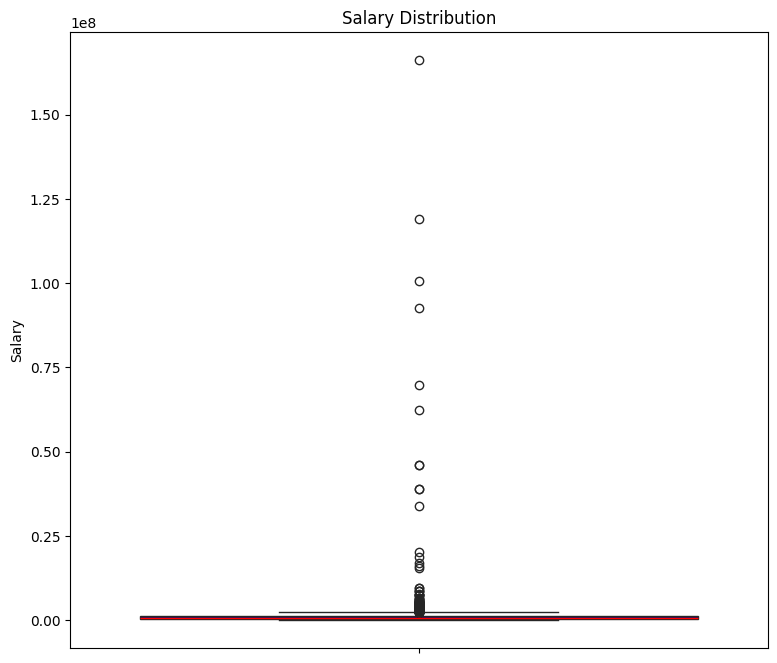

In [64]:
plt.figure(figsize=(9, 8))
sns.boxplot(y='Salary', data=salary_dataset, color='navy', medianprops=dict(color="red"))
plt.title('Salary Distribution')
plt.ylabel('Salary')

In [65]:
Q1 = salary_dataset['Salary'].quantile(0.25)
Q3 = salary_dataset['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

salary_dataset = salary_dataset[(salary_dataset['Salary'] >= lower_bound) & (salary_dataset['Salary'] <= upper_bound)]
salary_dataset.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,IBM,Data Scientist,95,Bangalore,1191950.0
2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,Accenture,Data Scientist,32,Bangalore,944110.0


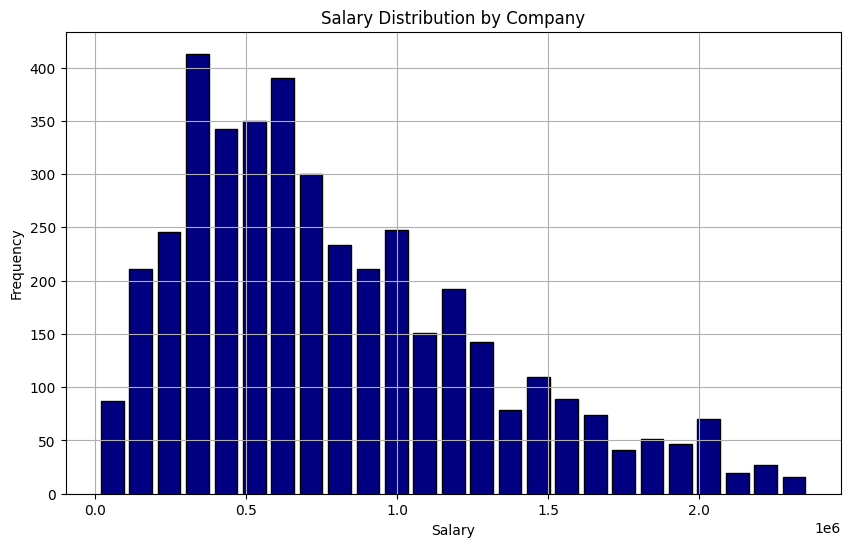

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(salary_dataset['Salary'], rwidth = 0.8, edgecolor = 'black', color='navy', bins=25)
plt.title('Salary Distribution by Company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid()

# Comparing salaries in two companies using a t-test

In [67]:
salary_dataset['Company Name'].value_counts()

,count
Company Name,
Tata Consultancy Services,40
Amazon,30
Accenture,29
Fresher,26
IBM,25
...,...
df,1
difference-engine.ai,1
Jsjsnsjxijssn,1


In [68]:
salary_dataset_company_ttest = salary_dataset[(salary_dataset['Company Name'] == 'Google') | (salary_dataset['Company Name'] == 'Amazon')]
salary_dataset_company_ttest.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
11,Amazon,Data Scientist,19,Bangalore,1507343.0
12,Google,Data Scientist,19,Bangalore,1558095.0
678,Amazon,Data Scientist,1,Bangalore,999998.0
912,Google,Data Scientist,1,Bangalore,480000.0
1055,Amazon,Data Scientist,1,Pune,115884.0


In [69]:
salary_dataset_company_ttest[salary_dataset_company_ttest['Company Name']=='Google']['Salary'].mean(), \
salary_dataset_company_ttest[salary_dataset_company_ttest['Company Name']=='Amazon']['Salary'].mean()

(np.float64(891723.9130434783), np.float64(756827.8))

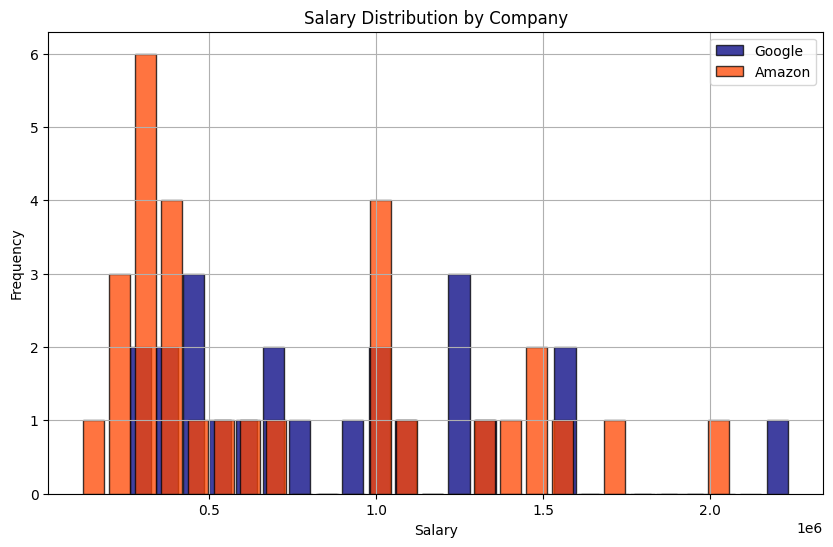

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(salary_dataset_company_ttest[salary_dataset_company_ttest['Company Name']=='Google']['Salary'], label='Google', alpha=0.75, color='navy', bins=25, rwidth = 0.8, edgecolor = 'black')
plt.hist(salary_dataset_company_ttest[salary_dataset_company_ttest['Company Name']=='Amazon']['Salary'], label='Amazon', alpha=0.75, color='orangered', bins=25, rwidth = 0.8, edgecolor = 'black')
plt.title('Salary Distribution by Company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

Text(0, 0.5, 'Salary')

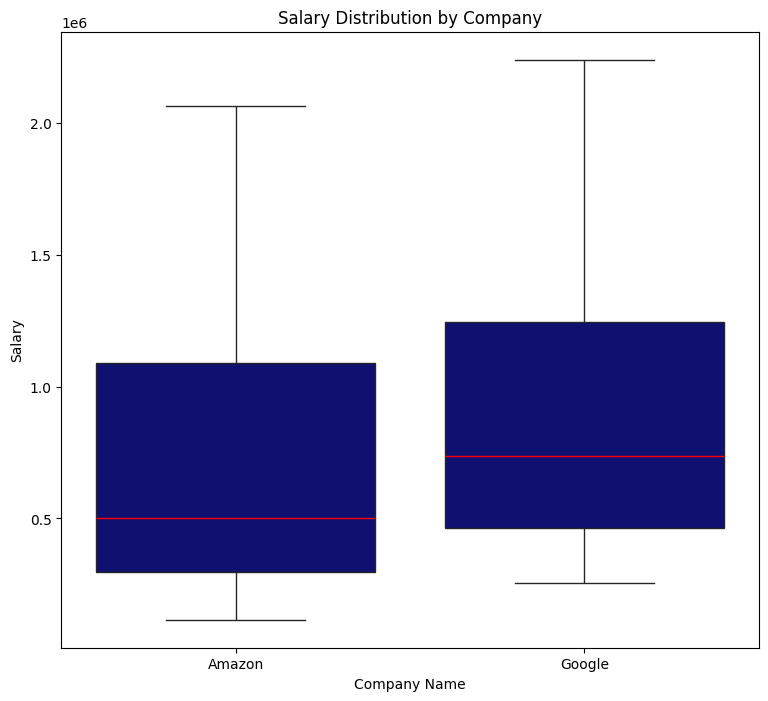

In [71]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Company Name', y='Salary', data=salary_dataset_company_ttest, color='navy', medianprops=dict(color="red"))
plt.title('Salary Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Salary')

In [72]:
stats.ttest_ind(salary_dataset_company_ttest[salary_dataset_company_ttest['Company Name']=='Google']['Salary'], \
                salary_dataset_company_ttest[salary_dataset_company_ttest['Company Name']=='Amazon']['Salary'])

TtestResult(statistic=np.float64(0.9277382986841869), pvalue=np.float64(0.35791334734143443), df=np.float64(51.0))

# Comparing salaries in two locations using a t-test

In [73]:
salary_dataset['Location'].value_counts()

,count
Location,
Bangalore,1505
Pune,767
Hyderabad,644
New Delhi,633
Mumbai,590


In [74]:
salary_dataset_location_ttest = salary_dataset[(salary_dataset['Location'] == 'Hyderabad') | (salary_dataset['Location'] == 'New Delhi')]
salary_dataset_location_ttest.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
1366,Microsoft,Data Scientist,23,Hyderabad,1712178.0
1367,Cyient,Data Scientist,20,Hyderabad,999578.0
1368,Tata Consultancy Services,Data Scientist,18,Hyderabad,697843.0
1369,Infosys,Data Scientist,18,Hyderabad,583334.0
1370,Amazon,Data Scientist,15,Hyderabad,1693961.0


In [75]:
salary_dataset_location_ttest[salary_dataset_location_ttest['Location']=='Hyderabad']['Salary'].mean(), \
salary_dataset_location_ttest[salary_dataset_location_ttest['Location']=='New Delhi']['Salary'].mean()

(np.float64(736418.3276397516), np.float64(759302.1327014219))

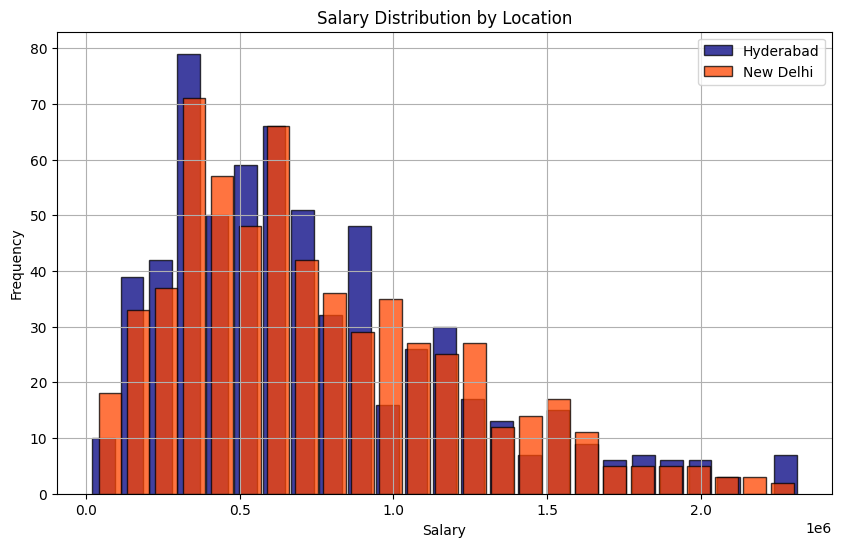

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(salary_dataset_location_ttest[salary_dataset_location_ttest['Location']=='Hyderabad']['Salary'], label='Hyderabad', alpha=0.75, color='navy', bins=25, rwidth = 0.8, edgecolor = 'black')
plt.hist(salary_dataset_location_ttest[salary_dataset_location_ttest['Location']=='New Delhi']['Salary'], label='New Delhi', alpha=0.75, color='orangered', bins=25, rwidth = 0.8, edgecolor = 'black')
plt.title('Salary Distribution by Location')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

Text(0, 0.5, 'Salary')

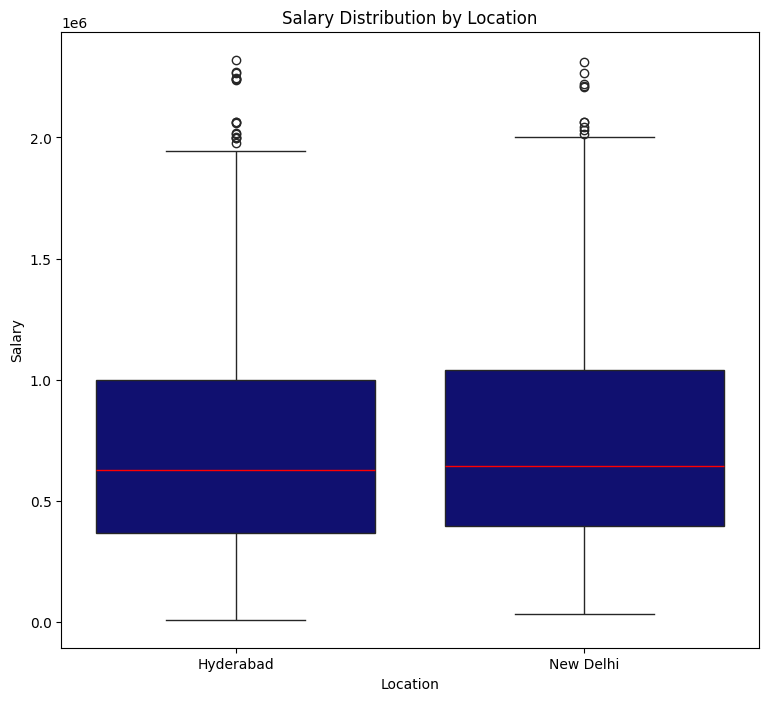

In [77]:
plt.figure(figsize=(9, 8))
sns.boxplot(x='Location', y='Salary', data=salary_dataset_location_ttest, color='navy', medianprops=dict(color="red"))
plt.title('Salary Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Salary')

In [78]:
stats.ttest_ind(salary_dataset_location_ttest[salary_dataset_location_ttest['Location']=='Hyderabad']['Salary'], \
                salary_dataset_location_ttest[salary_dataset_location_ttest['Location']=='New Delhi']['Salary'])

TtestResult(statistic=np.float64(-0.8713610315706718), pvalue=np.float64(0.3837210962386006), df=np.float64(1275.0))